*****操作手冊*****
1.請先確認此程式是否在一個獨立且不干涉其餘程式的資料夾中運行，此程式將會下載一些數據資料放入此資料夾
2.全程使用的瀏覽器為Chrome，如還沒有此瀏覽器請先前往"https://chromedriver.chromium.org/downloads"下載符合電腦作業系統的瀏覽器。並將執行檔(.exe)'放入正在運行的資料夾中
*****************
台股查詢功能:
1.: 查詢當日股票資訊
2.: 抓取股票歷史資料
3.: 預覽特定時間段歷史股票資訊
4.: 繪製簡易股票歷史【股價】【交易量】資料圖表
5.: 查詢股票股價現況
q : 退出
請輸入想要使用的功能: 4
請輸入想要繪製的歷史股價代碼(e.g.:2330)，輸入"q"或"Q"返回上一頁:2330
------------------------------
請輸入想要查找的開始日期(例:2023/1/1)，輸入"q"或"Q"返回首頁:2023/5/45
請輸入正確的日期格式
------------------------------
請輸入想要查找的開始日期(例:2023/1/1)，輸入"q"或"Q"返回首頁:2023/5/15
請輸入想要查找的結束日期(例:2023/12/31)，輸入"q"或"Q"返回首頁:2023/2/12
請按照「開始日期」與「結束日期」順序輸入
------------------------------
請輸入想要查找的開始日期(例:2023/1/1)，輸入"q"或"Q"返回首頁:2023/1/12
請輸入想要查找的結束日期(例:2023/12/31)，輸入"q"或"Q"返回首頁:2023/5/15


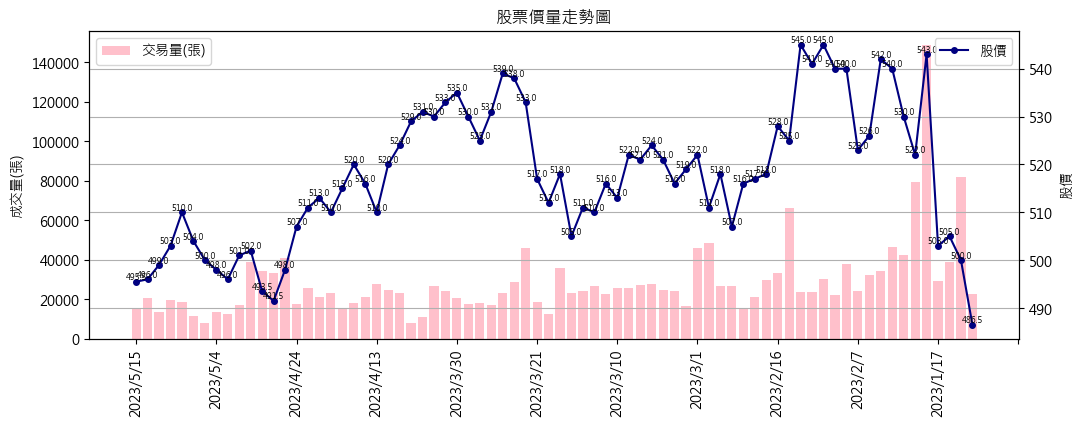

台股查詢功能:
1.: 查詢當日股票資訊
2.: 抓取股票歷史資料
3.: 預覽特定時間段歷史股票資訊
4.: 繪製簡易股票歷史【股價】【交易量】資料圖表
5.: 查詢股票股價現況
q : 退出
請輸入想要使用的功能: q
感謝使用此功能！


In [1]:
%run website.ipynb
%run csvDealing.ipynb
import os
import xlwings as xw
import datetime as dt

# 新增object
info = Info_obtain()
hist = HistoryData()

with open('Manual.txt', 'r', encoding = 'UTF-8') as f:
    print(f.read())
    

# 使用介面
while True:
    print('台股查詢功能:')
    print('1.: 查詢當日股票資訊')
    print('2.: 抓取股票歷史資料')
    print('3.: 預覽特定時間段歷史股票資訊')
    print('4.: 繪製簡易股票歷史【股價】【交易量】資料圖表')
    print('5.: 查詢股票股價現況')
    print('q : 退出')
    print('='*30)
    enter = input('請輸入想要使用的功能: ')

    match enter:
        case '1':
            stock_ID = input('請輸入想要查詢的台股股票代碼(e.g.:2330)，輸入"q"或"Q"返回上一頁:')
            print('-'*30)
            
            # 返回上一頁
            if stock_ID == 'q' or stock_ID == 'Q':
                print('='*30)
                continue
            
            try:
                #獲取股票基本資訊
                basic_info = info.get_info(stock_ID)
                info.display()
            except:
                print('找不到該支股票或是該股票在網站上的基本訊息')
                print('='*30)

        case '2':
            stock_ID = input('請輸入想要查詢的台股歷史資料代碼(e.g.:2330):')
            print('-'*30)
            
            # 返回上一頁
            if stock_ID == 'q' or stock_ID == 'Q':
                print('='*30)
                continue

            # 檢查是否有檔案
            if os.path.isfile(stock_ID+'_history.csv'):
                
                # 如果有檔案,檢查檔案最新日期是不是當日
                filename = stock_ID + '_history.csv'
                wb = xw.Book(filename)
                sheet = wb.sheets[stock_ID + '_history']
                
                # 如果是最新資料
                if sheet.cells(2, 'A').value.date() == dt.date.today():
                    print('您已經有此檔案的最新資訊了！您可以選擇預覽您的資料')
                    print('='*30)
                
                # 如果不是最新資料,詢問是否要更新
                else:
                    print('您目前所有的該股票的資訊更新到', sheet.cells(2, 'A').value.date())
                    print('-'*30)
                    choose = input('請問您要繼續更新嗎?(y/n)')
                    if choose == 'y':
                        wb.save()
                        wb.close()
                        
                        # 獲取股票歷史資料
                        info.get_hist_data(stock_ID)
                        
                        # 改名並儲存歷史資料csv檔
                        name = stock_ID
                        info.rename_file(name)
                        
                        # 提示更新完畢
                        print('資料更新完畢')
                        print('='*30)
                    elif choose == 'n':
                        wb.save()
                        wb.close()
                        print('='*30)
                        continue
                    else:
                        print('請輸入 y 或 n')
                        print('='*30)
                        wb.save()
                        wb.close()
                        continue
            
            # 檢查完如果沒有檔案,就上網下載
            else:
                # 獲取股票歷史資料
                info.get_hist_data(stock_ID)

                # 改名並儲存歷史資料csv檔
                info.rename_file(stock_ID)
                print('='*30)

        case '3':
            stock_ID = input('請輸入想要查詢的台股歷史資料代碼(e.g.:2330)，輸入"q"或"Q"返回上一頁:')
            print('-'*30)
            
            # 返回上一頁
            if stock_ID == 'q' or stock_ID == 'Q':
                print('='*30)
                continue
            
            # 檔名、工作表
            filename = stock_ID + '_history.csv'
            sheetname = stock_ID + '_history'
            
            # 開檔案、建立、預覽dataframe
            try:
                hist.open_file(filename, sheetname)
            except:
                print('找不到該股票的歷史存檔，請先使用「抓取股票歷史資料」的功能下載歷史資料')
                print('='*30)
                continue
            hist.find_date()
            try:
                hist.df_build()
                hist.df_display()
                hist.close_file()
            except:
                hist.close_file()
                continue

        case '4':
            stock_ID = input('請輸入想要繪製的歷史股價代碼(e.g.:2330)，輸入"q"或"Q"返回上一頁:')
            print('-'*30)
            
            # 返回上一頁
            if stock_ID == 'q' or stock_ID == 'Q':
                print('='*30)
                continue
            
            # 檔名、工作表
            filename = stock_ID + '_history.csv'
            sheetname = stock_ID + '_history'
            
            try:
                # 開檔案、建立dataframe
                hist.open_file(filename, sheetname)
            except:
                print('找不到該股票的歷史存檔，請先使用「抓取股票歷史資料」的功能下載歷史資料')
                print('='*30)
                continue
            
            hist.find_date()
            
            try:
                hist.df_build()
                # 畫圖
                hist.show_price_volume_chart()
                hist.close_file()
            except:
                print('暫存資料中沒有選定的日期範圍，請先完成「日期輸入」的步驟')
                print('='*30)
                continue
        
        case '5':
            stock_ID = input('請輸入要查詢股價現況的股票代碼(e.g.:2330)，輸入"q"或"Q"返回上一頁:')
            print('-'*30)
            
            # 返回上一頁
            if stock_ID == 'q' or stock_ID == 'Q':
                print('='*30)
                continue
            
            try:
                # 從網站上抓近三年的每週EPS與PER資料
                per, title, cur_price= info.hist_per(stock_ID)

                # 進行資料分析處理
                print('進行資料分析處理...')
                hist.analyze_per(per, title, cur_price)
                print('-'*30)

                # 從網站上抓現時的股價淨值比
                print('獲取股價淨值比...')
                info.PB_ratio(stock_ID)
                print('-'*30)
                
                # 判斷財報
                print('判斷財報...')
                info.financial_report(stock_ID)
                print('='*30)
            except:
                print('-'*30)
                print('該公司目前每股盈餘是虧錢的，或是該股票屬於ETF，因此無法比較目前的本益比、股價淨值比、財報資料')
                print('或是再檢查一次所輸入的股票代碼')
                print('='*30)
            
        case 'q':
            print('感謝使用此功能！')
            break
            
        case 'Q':
            print('感謝使用此功能！')
            break
            
        case _:
            print('請輸入正確關鍵字！')
            print('='*30)
            continue
           